In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bytearray([123])
b * 10

bytearray(b'{{{{{{{{{{')

In [3]:
sizes = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
b = bytearray([123])

for s in sizes:
    f = open(f'file_{s}', 'wb')
    f.write(b * s)
    f.close()

In [4]:
import os

path = '../cmake-build-debug/file_reading_analysis'
def run(type, size):
    os.system(f'{path} -m {type} -b 1024 -i file_{size} -o report.csv -v -r 10')

In [5]:
for m in ['mmap', 'read', 'ifstream']:
    for s in sizes:
        run(m, s)

Method: mmap
	Size: 1
	Time: 14.413
	123 1
Method: mmap
	Size: 1
	Time: 6.642
	123 2
Method: mmap
	Size: 1
	Time: 6.163
	123 3
Method: mmap
	Size: 1
	Time: 4.567
	123 4
Method: mmap
	Size: 1
	Time: 4.231
	123 5
Method: mmap
	Size: 1
	Time: 4.927
	123 6
Method: mmap
	Size: 1
	Time: 4.256
	123 7
Method: mmap
	Size: 1
	Time: 4.181
	123 8
Method: mmap
	Size: 1
	Time: 4.263
	123 9
Method: mmap
	Size: 1
	Time: 4.017
	123 10
Method: mmap
	Size: 10
	Time: 13.582
	123 10
Method: mmap
	Size: 10
	Time: 8.545
	123 20
Method: mmap
	Size: 10
	Time: 7.928
	123 30
Method: mmap
	Size: 10
	Time: 5.601
	123 40
Method: mmap
	Size: 10
	Time: 5.391
	123 50
Method: mmap
	Size: 10
	Time: 7.27
	123 60
Method: mmap
	Size: 10
	Time: 5.796
	123 70
Method: mmap
	Size: 10
	Time: 7.537
	123 80
Method: mmap
	Size: 10
	Time: 6.192
	123 90
Method: mmap
	Size: 10
	Time: 6.707
	123 100
Method: mmap
	Size: 100
	Time: 12.759
	123 100
Method: mmap
	Size: 100
	Time: 7.887
	123 200
Method: mmap
	Size: 100
	Time: 5.393
	123 30

In [6]:
df = pd.read_csv('report.csv')
df

,method,duration,size
0,mmap,13.765,1
1,mmap,7.485,1
2,mmap,5.187,1
3,mmap,4.675,1
4,mmap,4.262,1
...,...,...,...
919,ifstream,3324340.000,1000000000
920,ifstream,3331370.000,1000000000
921,ifstream,3320670.000,1000000000
922,ifstream,3326530.000,1000000000


In [7]:
maxs = df.groupby('size')['duration'].transform('max')
df = df[~(df['duration'] == maxs)]
df

,method,duration,size
0,mmap,13.765,1
1,mmap,7.485,1
2,mmap,5.187,1
3,mmap,4.675,1
4,mmap,4.262,1
...,...,...,...
919,ifstream,3324340.000,1000000000
920,ifstream,3331370.000,1000000000
921,ifstream,3320670.000,1000000000
922,ifstream,3326530.000,1000000000


Text(0.5, 0, 'Size, b')

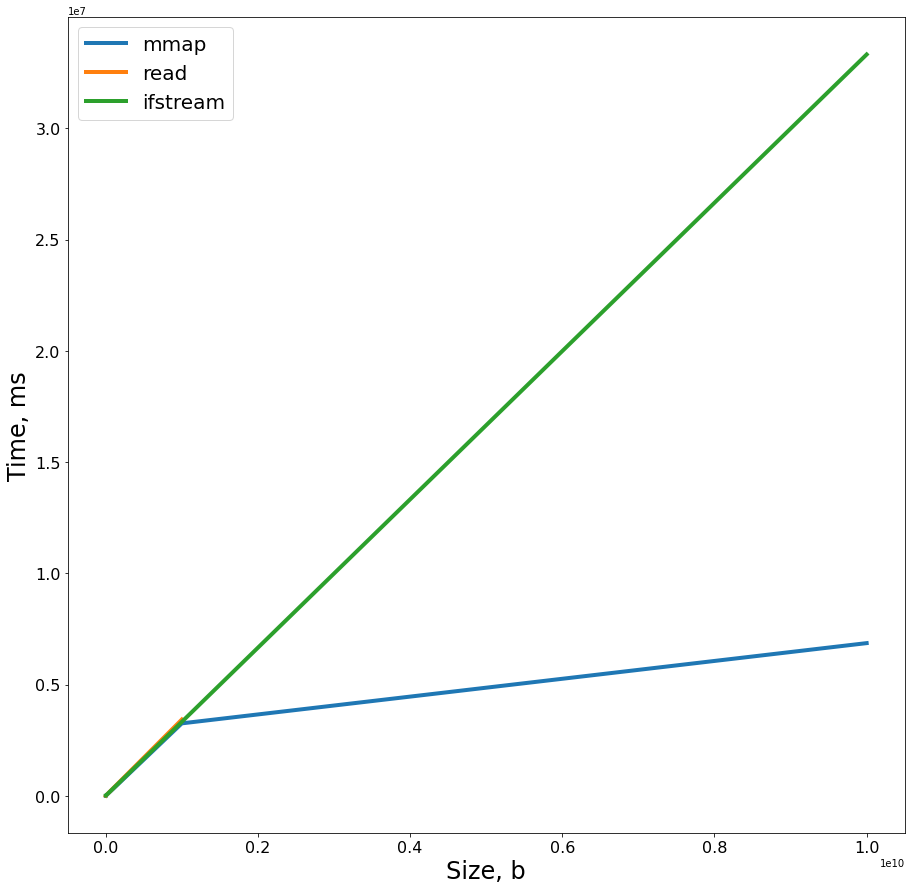

In [8]:
ax = df[df['method'] == 'mmap'].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4)
ax = df[df['method'] == 'read'].groupby('size').mean().plot(y='duration', ax=ax, figsize=(15,15), fontsize=16, lw=4)
ax = df[df['method'] == 'ifstream'].groupby('size').mean().plot(y='duration', ax=ax, figsize=(15,15), fontsize=16, lw=4)
ax.legend(['mmap', 'read', 'ifstream'], fontsize=20)
ax.set_ylabel('Time, ms', fontdict={'fontsize':24})
ax.set_xlabel('Size, b', fontdict={'fontsize':24})    